# Section 1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic

df = pd.read_csv('/content/Section 1 data.csv')

In [3]:
df.head(3)

,Review_Date,Review_Text,User_ID,Business_ID,Business_Name,Business_Category,City,State,Latitude,Longitude,Avg_Business_Star_Rating
0,2014-07-16,okay...so so,6VxJJX7h36bMCCFt7URg6w,9QqLqYIwV-n1BJPjnaYv8A,Beef 'O' Brady's,Bars,Chandler,AZ,33.303847,-111.946838,3.5
1,2014-07-16,Some people complain about the prices but Subw...,viGPiPuMZnV4PR_aiA3-qw,pNQwnY_q4okdlnPiR-3RBA,Empire Bagels,Food,Las Vegas,NV,36.077299,-115.297979,3.5
2,2014-07-16,"Had red curry chicken, the chicken itself was ...",rwehMCinfBjhZ0IbR1zFBw,shCdCHRbnY5FTMJbWl-myQ,Thai Spices,Thai,Mesa,AZ,33.412708,-111.875803,4.0


**1. How many unique restaurants could be found in this data set?**

In [4]:
# get the restuarants
restaurants_df = df[df['Business_Category'].str.contains('Restaurants', na=False)]

# get # of uniq restuarants
unique_restaurants = restaurants_df['Business_ID'].nunique()
print(f'The number of unique restaurants is: {unique_restaurants}')

The number of unique restaurants is: 594


**2. Which restaurant received the highest number of reviews? What about percentage-wise?**

In [5]:
# use bussiness id becuase it is unique gives count of 594 | bussiness names give 500ish becuase it is agrigating resturants of different locations
reviews_per_restaurant = restaurants_df['Business_ID'].value_counts()

# Restaurant with the highest number of reviews
top_restaurant_id = reviews_per_restaurant.index[0]
top_restaurant_reviews = reviews_per_restaurant.iloc[0]

# Get the restaurant's name
top_restaurant_name = restaurants_df.loc[restaurants_df['Business_ID'] == top_restaurant_id, 'Business_Name'].iloc[0]


total_reviews = restaurants_df.shape[0] # total reviews of resturants (6k ish)
percentage = (top_restaurant_reviews / total_reviews) * 100

print(f"The restaurant with the highest number of reviews is: {top_restaurant_name} with {top_restaurant_reviews} reviews.")
print(f"This represents {percentage:.2f}% of all restaurant reviews.")

reviews_per_restaurant

The restaurant with the highest number of reviews is: LAVO Italian Restaurant & Lounge with 201 reviews.
This represents 3.09% of all restaurant reviews.


,count
Business_ID,
5GKbGn9-fAgQ0njSh3OJ8A,201
iXA8Y2bzvZo8MjALfZxrIg,137
8Pzdk19tA2bKlKDSgwWqoQ,134
-2n-OHbbwIv3SY8RP9bgTQ,126
rNahhyqDlouyDMHh57p3ug,110
...,...
I5D1mgfy_78EAiKIlzxfGg,1
8UgadStqK8dTj6wRLg3CsA,1
rfuCmgGhWoBLx5QvZqadwg,1


**3. Which cities have got at least one 5-star review in Nevada (NV) state?**

In [6]:
# filter for in Nevada & 5-star
nevada_five_star_reviews = df[(df['State'] == 'NV') & (df['Avg_Business_Star_Rating'] == 5)]

cities = nevada_five_star_reviews['City'].unique()

print("Cities in Nevada with at least one 5-star review:")
for city in cities:
    print(city)

Cities in Nevada with at least one 5-star review:
Las Vegas
Henderson
Boulder City
Nellis


**4. Which city has the highest number of reviews in the Business Category of “Hotels & Travel”? What about percentage-wise?**

In [7]:
# filter for 'Hotels & Travel' category
hotels_travel_df = df[df['Business_Category'].str.contains('Hotels & Travel', na=False)]

# reviews per city
reviews_per_city = hotels_travel_df['City'].value_counts()

# city with the highest number of reviews
top_city = reviews_per_city.index[0]
top_city_reviews = reviews_per_city.iloc[0]

# Calculate percentage
total_ht_reviews = hotels_travel_df.shape[0]
percentage = (top_city_reviews / total_ht_reviews) * 100

print(f"The city with the highest number of 'Hotels & Travel' reviews is: {top_city} with {top_city_reviews} reviews.")
print(f"This represents {percentage:.2f}% of all 'Hotels & Travel' reviews.")


The city with the highest number of 'Hotels & Travel' reviews is: Las Vegas with 10245 reviews.
This represents 77.64% of all 'Hotels & Travel' reviews.


**5. At what day of the week are people more likely to post their reviews?**

In [8]:
# 'Review_Date' to datetime
df['Review_Date'] = pd.to_datetime(df['Review_Date'])

# get day of the week
df['DayOfWeek'] = df['Review_Date'].dt.day_name()

# count reviews per day
reviews_per_day = df['DayOfWeek'].value_counts()

print("Number of reviews per day of the week:")
print(reviews_per_day)

# Day with the highest number of reviews
top_day = reviews_per_day.index[0]
top_day_reviews = reviews_per_day.iloc[0]

print()
print(f"The day people are most likely to post reviews is: {top_day} with {top_day_reviews} reviews.")


Number of reviews per day of the week:
DayOfWeek
Monday       36446
Tuesday      34262
Wednesday    34170
Sunday       32889
Thursday     30669
Friday       29574
Saturday     29571
Name: count, dtype: int64

The day people are most likely to post reviews is: Monday with 36446 reviews.


**6. Showcase if there are any trends regarding restaurant performance as time goes by.**

<ipython-input-9-1dbeced6119c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants_df['Review_Date'] = pd.to_datetime(restaurants_df['Review_Date'])
<ipython-input-9-1dbeced6119c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants_df['YearMonth'] = restaurants_df['Review_Date'].dt.to_period('M')


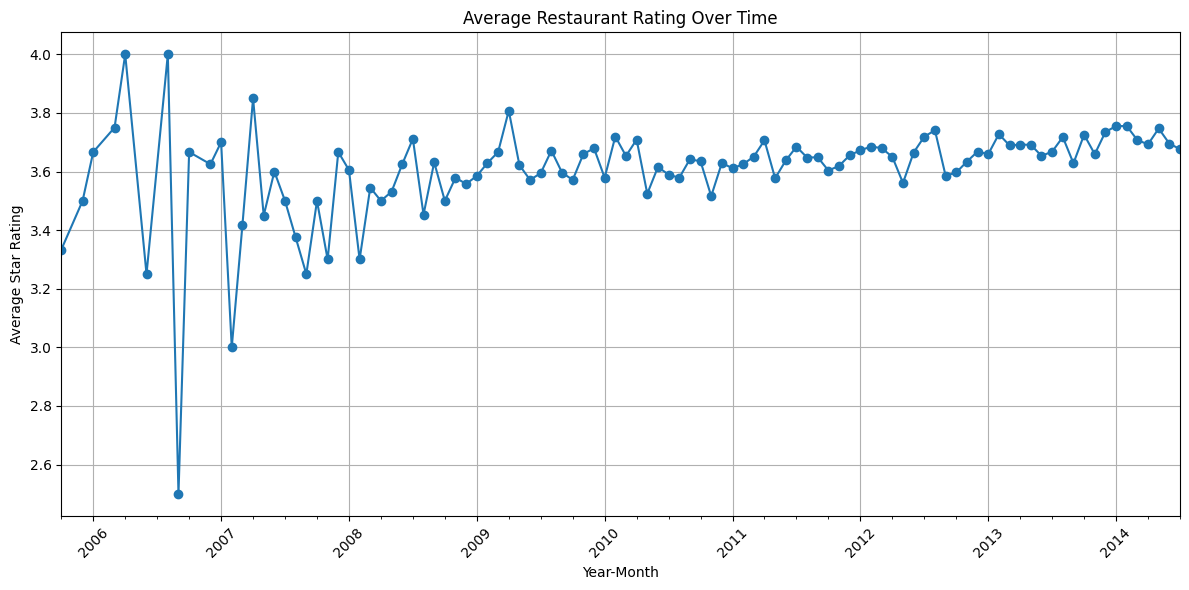

In [9]:
# Ensure 'Review_Date' is in datetime format
restaurants_df['Review_Date'] = pd.to_datetime(restaurants_df['Review_Date'])

# Extract Year-Month from 'Review_Date'
restaurants_df['YearMonth'] = restaurants_df['Review_Date'].dt.to_period('M')

# Calculate the average rating of all restaurants per month
avg_rating_over_time = restaurants_df.groupby('YearMonth')['Avg_Business_Star_Rating'].mean()

# Plot the trend of average restaurant rating over time
plt.figure(figsize=(12, 6))
avg_rating_over_time.plot(marker='o')
plt.title('Average Restaurant Rating Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Star Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
# Ensure 'Avg_Business_Star_Rating' is numeric
restaurants_df['Avg_Business_Star_Rating'] = pd.to_numeric(restaurants_df['Avg_Business_Star_Rating'], errors='coerce')

# Calculate average rating and review count per restaurant
restaurant_ratings = restaurants_df.groupby('Business_ID').agg({
    'Avg_Business_Star_Rating': 'mean',
    'Business_Name': 'first',
    'Review_Text': 'count'
}).rename(columns={'Review_Text': 'Review_Count'})

# Set a minimum number of reviews to filter out restaurants with insufficient data
min_reviews = 30  # You can adjust this threshold as needed
filtered_restaurant_ratings = restaurant_ratings[restaurant_ratings['Review_Count'] >= min_reviews]

# Find the restaurant with the highest average rating
top_restaurant = filtered_restaurant_ratings.sort_values(by='Avg_Business_Star_Rating', ascending=False).iloc[0]

print(f"The top-performing restaurant is: {top_restaurant['Business_Name']}")
print(f"Average Rating: {top_restaurant['Avg_Business_Star_Rating']:.2f}")
print(f"Number of Reviews: {top_restaurant['Review_Count']}")


The top-performing restaurant is: SOLO Trattoria
Average Rating: 4.50
Number of Reviews: 35


<ipython-input-10-6105c22b5154>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants_df['Avg_Business_Star_Rating'] = pd.to_numeric(restaurants_df['Avg_Business_Star_Rating'], errors='coerce')


**8. Bonus Question: Which user had the highest cumulative travel distance? What distance has been covered by him/her?**

In [11]:
# Sort data by User_ID and Review_Date
df_sorted = df.sort_values(by=['User_ID', 'Review_Date'])

# shift Latitude and Longitude to get previous business location per user (create new column to hold place of prev location)
df_sorted['Latitude_prev'] = df_sorted.groupby('User_ID')['Latitude'].shift()
df_sorted['Longitude_prev'] = df_sorted.groupby('User_ID')['Longitude'].shift()

# drop rows with missing previous locations
df_distance = df_sorted.dropna(subset=['Latitude_prev', 'Longitude_prev'])

# Calculate distance between consecutive reviews
def calculate_distance(row):
    coords_1 = (row['Latitude_prev'], row['Longitude_prev']) # prev location of review of user
    coords_2 = (row['Latitude'], row['Longitude']) # current location of review of user
    return geodesic(coords_1, coords_2).kilometers

# creat new column for distance
df_distance['Distance'] = df_distance.apply(calculate_distance, axis=1)

# cumulative distance per user
cumulative_distance = df_distance.groupby('User_ID')['Distance'].sum()

top_user_id = cumulative_distance.idxmax()
top_user_distance = cumulative_distance.max()

print(f"The user with the highest cumulative travel distance is: {top_user_id} with a total distance of {top_user_distance:.2f} kilometers.")


The user with the highest cumulative travel distance is: 6uYJ-ixRxPMyf-iEbhoz2g with a total distance of 31847.14 kilometers.


<ipython-input-11-36524990b933>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_distance['Distance'] = df_distance.apply(calculate_distance, axis=1)


# Section 2

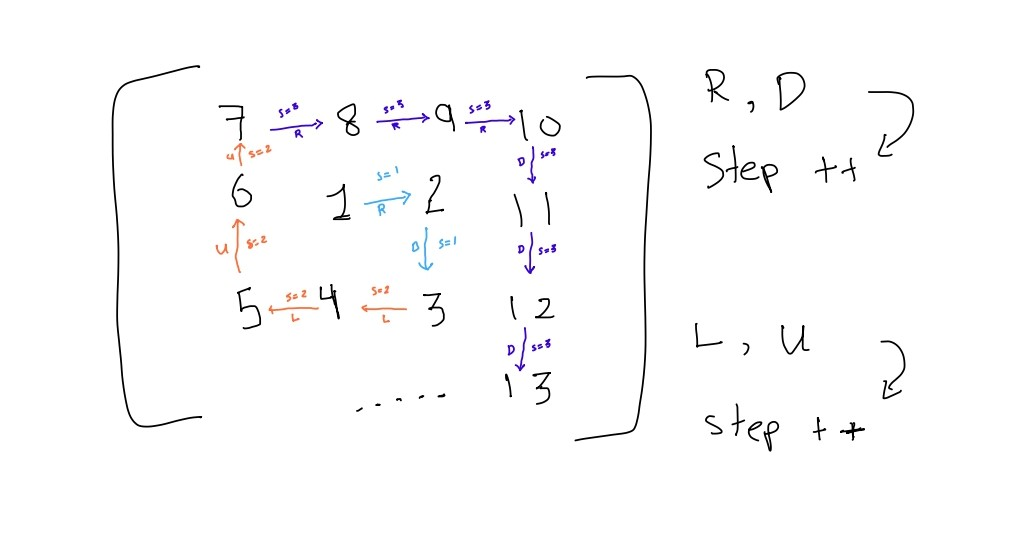

In [12]:
def generate_spiral_matrix(N):

    matrix = [[0 for _ in range(N)] for _ in range(N)]

    # center
    center = N // 2
    x, y = center, center

    # fill center & creat 'counter'
    matrix[x][y] = 1
    current_num = 2

    matrix_size = N * N

    # Right, Down, Left, Up
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    steps = 1

    while current_num <= matrix_size: # 1 to matrix_size
        for i in range(4): # for each direction
            dx, dy = directions[i]
            for _ in range(steps):
                x += dx
                y += dy

                matrix[x][y] = current_num
                current_num += 1
                if current_num > matrix_size:
                  break
            # Increment steps after right down OR moving left and up
            if i % 2 == 1:
                steps += 1
            if current_num > matrix_size:
                break


    return matrix

def diag_sums(mtrx):
  primary_sum = 0
  secondary_sum = 0
  for i in range(N):
    primary_sum += mtrx[i][i]  # Element on the primary diagonal
    secondary_sum += mtrx[i][N - 1 - i]  # Element on the secondary diagonal
  print(f"Sum of the primary diagonal: {primary_sum}")
  print(f"Sum of the secondary diagonal: {secondary_sum}")

def print_matrix(matrix):
    for row in matrix:
        print(' '.join(f"{num:2}" for num in row))


In [13]:
# use
N = 5
spiral_matrix = generate_spiral_matrix(N)
print_matrix(spiral_matrix)
print()
diag_sums(spiral_matrix)

21 22 23 24 25
20  7  8  9 10
19  6  1  2 11
18  5  4  3 12
17 16 15 14 13

Sum of the primary diagonal: 45
Sum of the secondary diagonal: 57


# Section 3

In [14]:
import pandas as pd


data = pd.read_csv('/content/Section 3 data.csv', header=None)

# Assuming you know the depth range and time range
num_rows = data.shape[0]
num_cols = data.shape[1]

# place holder values
depth = [f"sensor at {i}m" for i in range(num_rows)]
minutes = [f"{i} min" for i in range(num_cols)]

# Assign headers
data.index = depth
data.columns = minutes

# Save with headers if needed
data.to_csv('das_data_with_headers.csv', index_label='Depth (m)')


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data with headers as established previously
data = pd.read_csv('das_data_with_headers.csv', index_col='Depth (m)')

data.head()


,0 min,1 min,2 min,3 min,4 min,5 min,6 min,7 min,8 min,9 min,...,51 min,52 min,53 min,54 min,55 min,56 min,57 min,58 min,59 min,60 min
Depth (m),,,,,,,,,,,,,,,,,,,,,
sensor at 0m,3.356727,3.424688,3.315129,2.866585,3.259163,3.063364,3.022052,3.709724,3.059833,2.890529,...,3.299550,3.197463,3.171961,3.526297,3.013812,3.373963,3.448313,3.622836,3.211477,3.422257
sensor at 1m,3.264011,3.331538,3.254502,2.816155,3.175651,2.995944,2.963060,3.618391,3.015709,2.849339,...,3.220985,3.110368,3.108212,3.489397,2.960912,3.306820,3.417709,3.524081,3.141618,3.361223
sensor at 2m,3.170393,3.238018,3.185075,2.759907,3.089149,2.929650,2.906405,3.522798,2.967472,2.804227,...,3.139422,3.024213,3.043078,3.437473,2.904058,3.234052,3.370602,3.421170,3.069848,3.288135
sensor at 3m,3.073419,3.143099,3.082911,2.682017,2.991492,2.867536,2.858474,3.411356,2.903908,2.744555,...,3.046735,2.941585,2.972789,3.329692,2.832499,3.140333,3.262105,3.302803,2.990968,3.170215
sensor at 4m,2.976448,3.048187,2.980743,2.604133,2.893835,2.805416,2.810538,3.299923,2.840350,2.684883,...,2.954042,2.858966,2.902495,3.221916,2.760934,3.046621,3.153600,3.184436,2.912082,3.052295


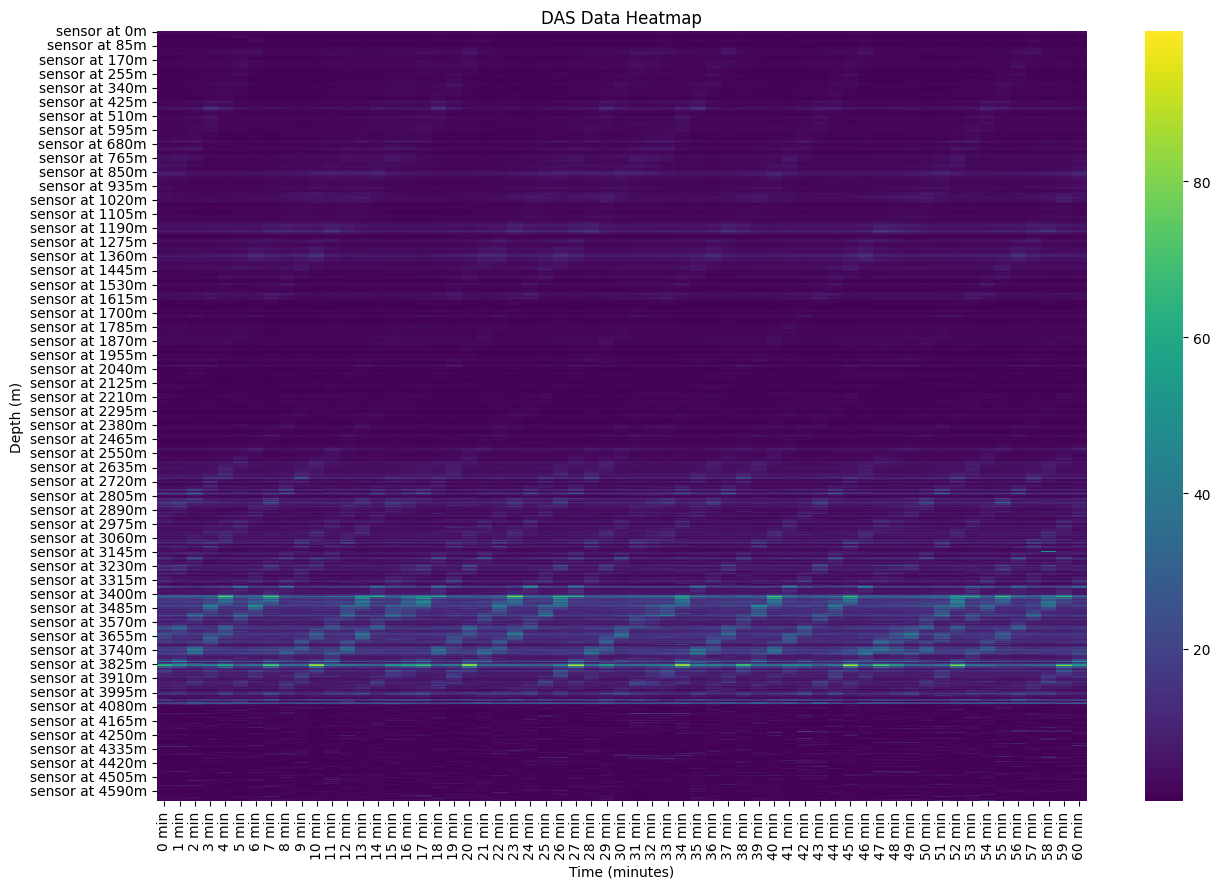

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(data, cmap='viridis')
plt.title('DAS Data Heatmap')
plt.xlabel('Time (minutes)')
plt.ylabel('Depth (m)')
plt.show()


Identified peaks at time indices: [ 3 18 29 35 55]
Peak values: [5.94053459 7.0626235  6.49142361 6.45958519 5.79927921]


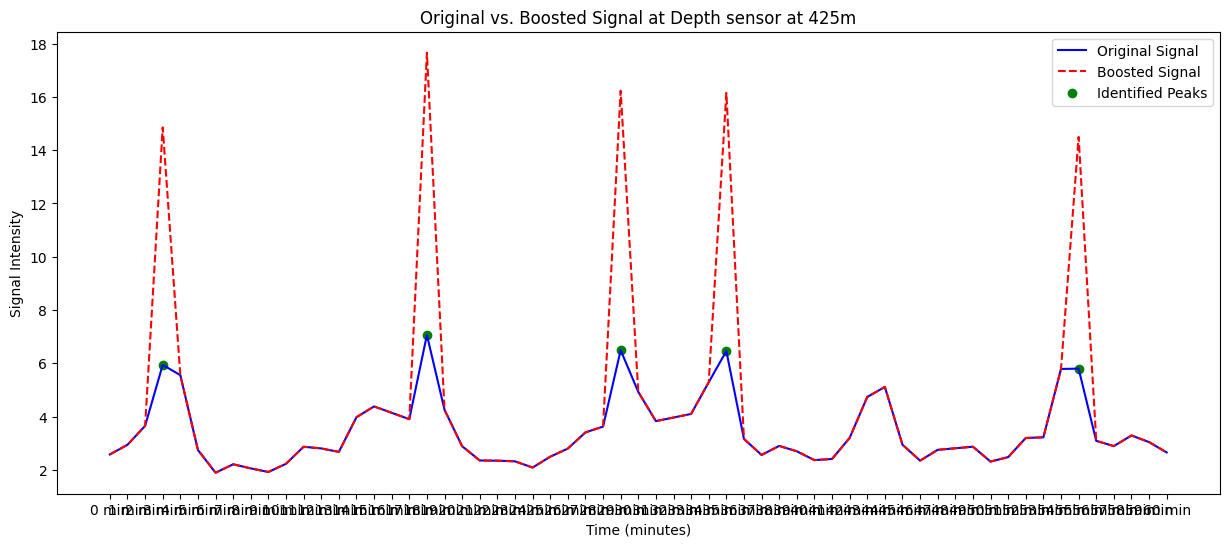

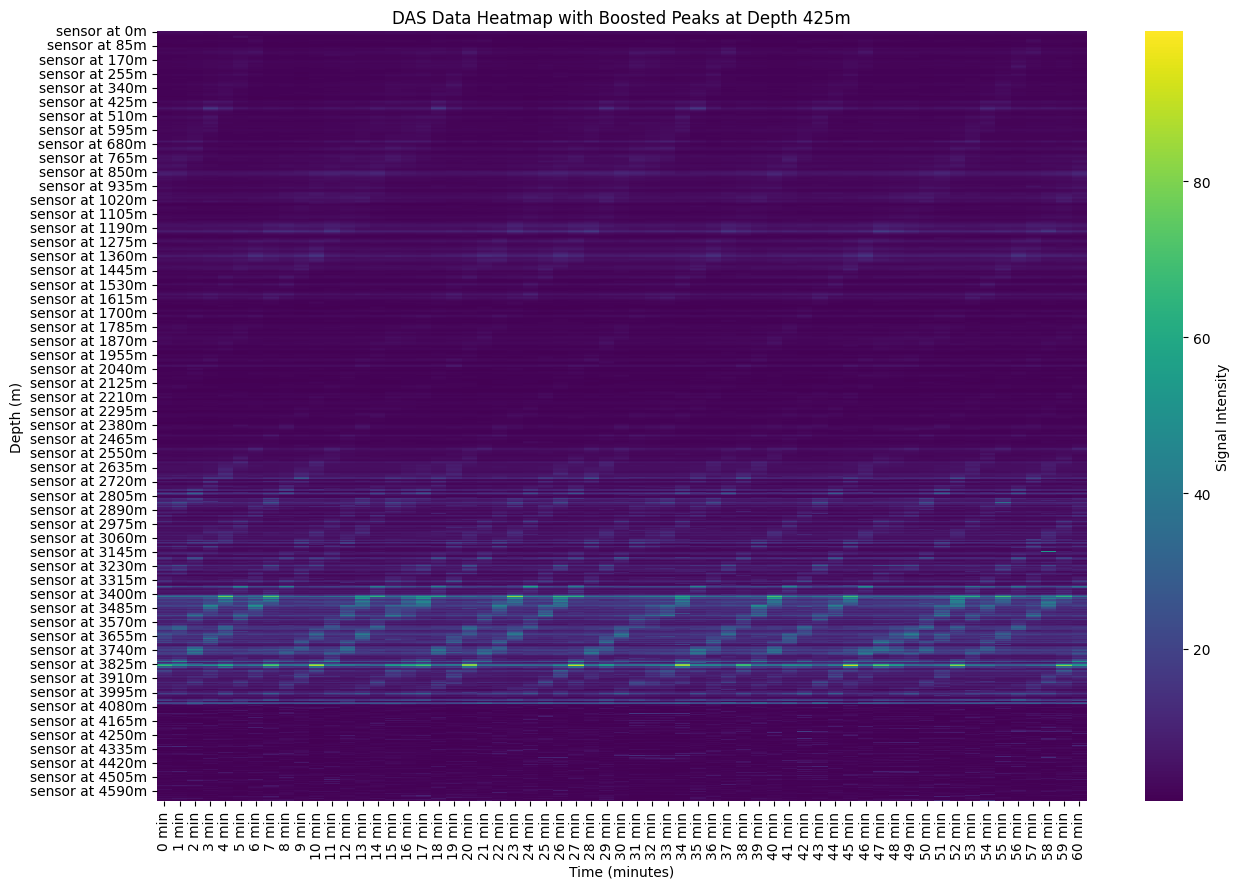

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks

# Load the data
data = pd.read_csv('das_data_with_headers.csv', index_col='Depth (m)')

# Select the depth of interest
depth = 'sensor at 425m'
depth_data = data.loc[depth]
signal = depth_data.values

# Calculate mean and standard deviation
mean_signal = np.mean(signal)
std_signal = np.std(signal)

# Define peak detection parameters
mean_multiplier = 1.5
height_threshold = mean_signal + mean_multiplier * std_signal
distance = 1  # Minimum distance between peaks

# Find peaks
peaks, properties = find_peaks(signal, height=height_threshold, distance=distance)

print(f"Identified peaks at time indices: {peaks}")
print(f"Peak values: {signal[peaks]}")

# Define boost factor
boost_factor = 2.5

# Boost the peak values
boosted_signal = signal.copy()
boosted_signal[peaks] = boosted_signal[peaks] * boost_factor

# Update the DataFrame
data_boosted = data.copy()
data_boosted.loc[depth] = boosted_signal

# Plot Original and Boosted Signals
plt.figure(figsize=(15, 6))
plt.plot(depth_data.index, signal, label='Original Signal', color='blue')
plt.plot(depth_data.index, boosted_signal, label='Boosted Signal', color='red', linestyle='--')
plt.scatter(depth_data.index[peaks], signal[peaks], color='green', label='Identified Peaks')
plt.title(f'Original vs. Boosted Signal at Depth {depth}')
plt.xlabel('Time (minutes)')
plt.ylabel('Signal Intensity')
plt.legend()
plt.show()

# Optional: Visualize the entire dataset with boosted peaks
plt.figure(figsize=(15, 10))
sns.heatmap(data_boosted, cmap='viridis', cbar_kws={'label': 'Signal Intensity'})
plt.title('DAS Data Heatmap with Boosted Peaks at Depth 425m')
plt.xlabel('Time (minutes)')
plt.ylabel('Depth (m)')
plt.show()


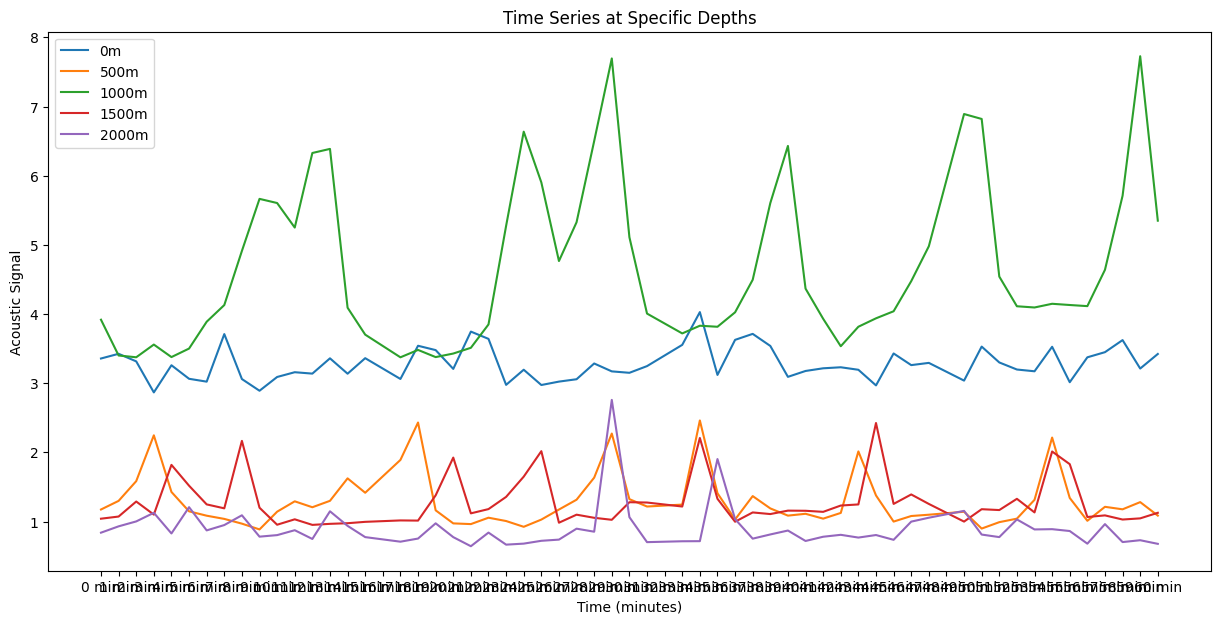

In [17]:
specific_depths = [0, 500, 1000, 1500, 2000]  # Example depths
plt.figure(figsize=(15, 7))
for depth in specific_depths:
    plt.plot(data.columns, data.loc[f'sensor at {depth}m'], label=f'{depth}m')
plt.title('Time Series at Specific Depths')
plt.xlabel('Time (minutes)')
plt.ylabel('Acoustic Signal')
plt.legend()
plt.show()


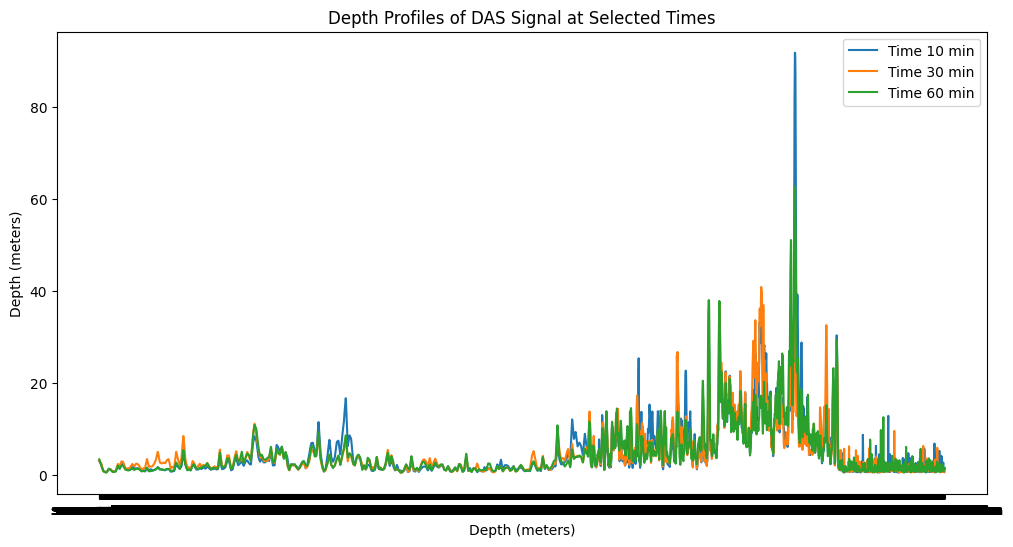

In [18]:
time_indices = [10, 30, 60]  # Example time points
plt.figure(figsize=(12, 6))
for idx in time_indices:
    plt.plot(data.iloc[:, idx], label=f'Time {idx} min')
plt.title('Depth Profiles of DAS Signal at Selected Times')
plt.xlabel('Depth (meters)')
plt.ylabel('Depth (meters)')
plt.legend()
plt.gca()
plt.show()


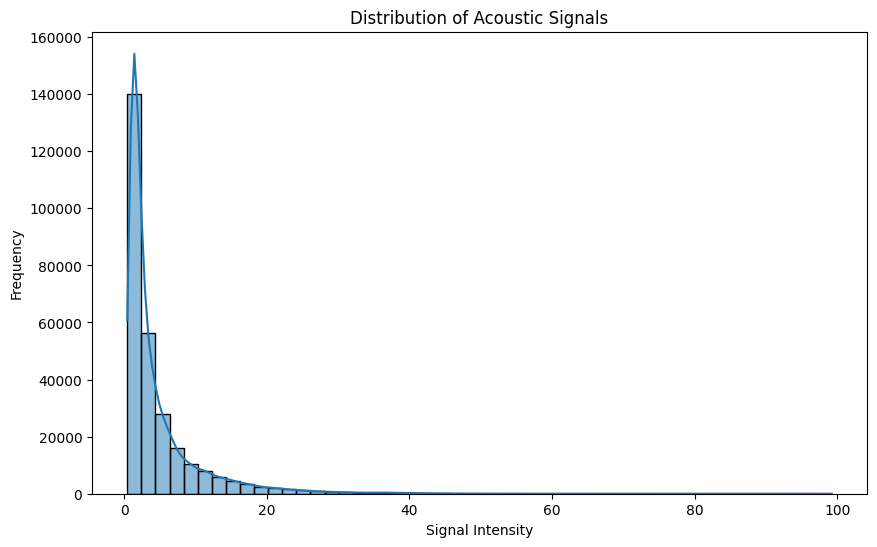

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data.values.flatten(), bins=50, kde=True)
plt.title('Distribution of Acoustic Signals')
plt.xlabel('Signal Intensity')
plt.ylabel('Frequency')
plt.show()
